<a href="https://colab.research.google.com/github/towardsai/tutorials/blob/master/gradient_descent_tutorial/gradient_descent_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Descent Algorithm Implementation

* Tutorial: https://towardsai.net/p/data-science/gradient-descent-algorithm-for-machine-learning-python-tutorial-ml-9ded189ec556
* Github: https://github.com/towardsai/tutorials/tree/master/gradient_descent_tutorial

In [ ]:
#Download the dataset
!wget https://raw.githubusercontent.com/towardsai/tutorials/master/gradient_descent_tutorial/data.txt

--2020-12-21 02:45:22--  https://raw.githubusercontent.com/towardsai/tutorials/master/gradient_descent_tutorial/data.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1359 (1.3K) [text/plain]
Saving to: ‘data.txt’

data.txt            100%[===================>]   1.33K  --.-KB/s    in 0s      

2020-12-21 02:45:22 (62.5 MB/s) - ‘data.txt’ saved [1359/1359]



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline

In [ ]:
column_names = ['Population', 'Profit']
df = pd.read_csv('data.txt', header=None, names=column_names)  
df.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [ ]:
df.insert(0, 'Theta0', 1)
cols = df.shape[1]
X = df.iloc[:,0:cols-1]  
Y = df.iloc[:,cols-1:cols]
    
theta = np.matrix(np.array([0]*X.shape[1]))  
X = np.matrix(X.values)  
Y = np.matrix(Y.values)

In [ ]:
def calculate_RSS(X, y, theta):  
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [ ]:
def gradientDescent(X, Y, theta, alpha, iters):  
    t = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - Y

        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            t[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))

        theta = t
        cost[i] = calculate_RSS(X, Y, theta)

    return theta, cost

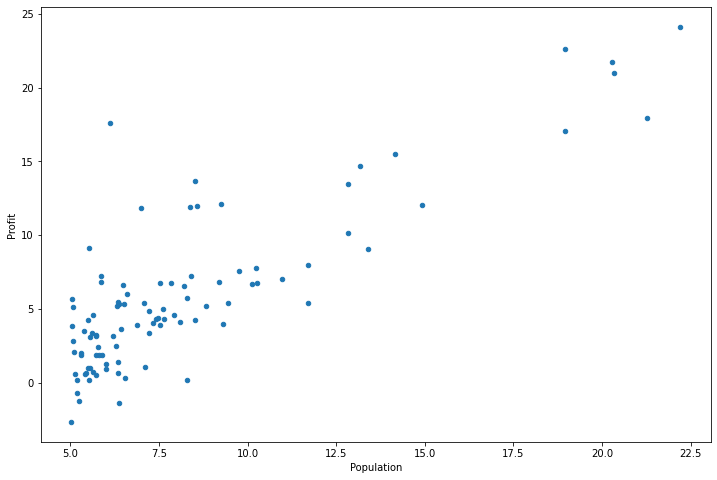

In [ ]:
df.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))

**Error before applying Gradient Descent**

In [ ]:
error = calculate_RSS(X, Y, theta)
error

32.072733877455676

**Apply Gradient Descent**

In [ ]:
g, cost = gradientDescent(X, Y, theta, 0.01, 1000)  
g

matrix([[-3.24140214,  1.1272942 ]])

**Error after Applying Gradient Descent**

In [ ]:
error = calculate_RSS(X, Y, g)
error

4.515955503078912

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

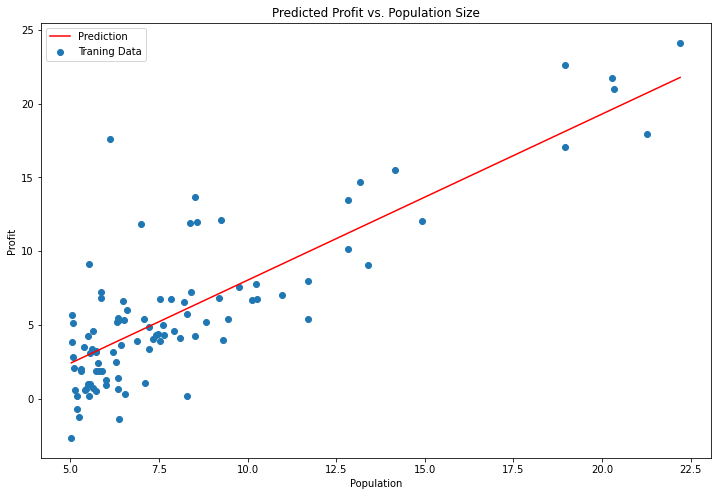

In [ ]:
x = np.linspace(df.Population.min(), df.Population.max(), 100)  
f = g[0, 0] + (g[0, 1] * x)
fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(x, f, 'r', label='Prediction')  
ax.scatter(df.Population, df.Profit, label='Traning Data')  
ax.legend(loc=2)  
ax.set_xlabel('Population')  
ax.set_ylabel('Profit')  
ax.set_title('Predicted Profit vs. Population Size')